In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import load_boston

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Train_test_split

In [3]:
x = df
y = boston_data.target


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

## Model Training

In [5]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

# Evaluation

In [6]:
# Testing data evaluation
y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('MSE: ', mse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',mae)

r2 = r2_score(y_test,y_pred)
print('R2 score: ',r2)

MSE:  44.914613157894735
MAE:  4.488289473684211
R2 score:  0.5099572909288324


In [7]:
# Training data evaluation
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('MSE: ', mse)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE: ',mae)

r2 = r2_score(y_train,y_pred_train)
print('R2 score: ',r2)

MSE:  28.628083615819207
MAE:  3.7674576271186444
R2 score:  0.6473899011701423


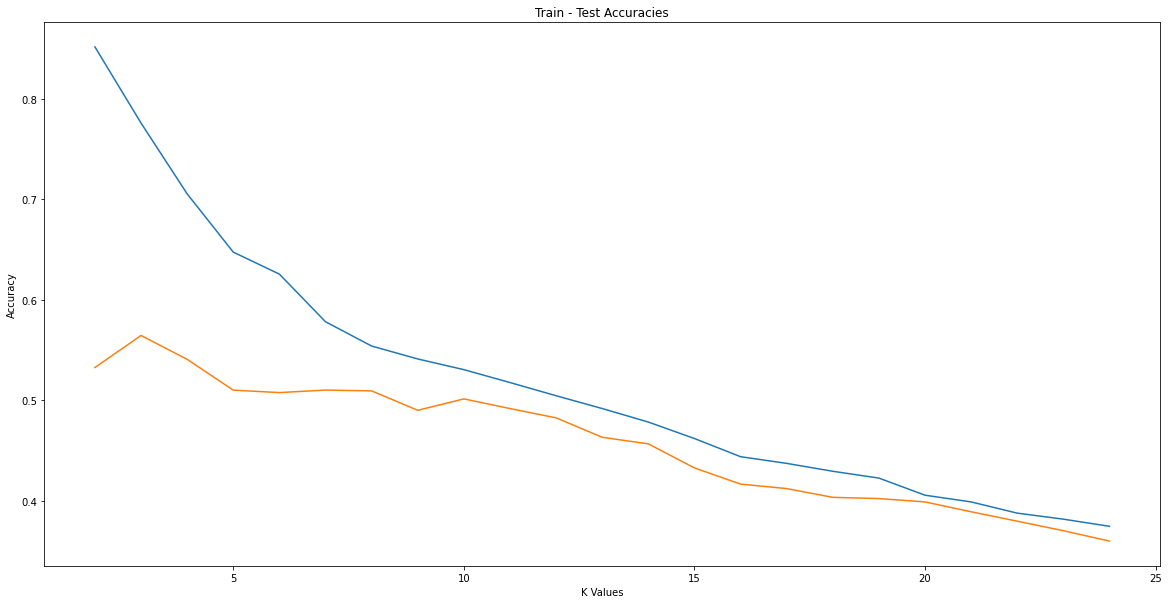

In [8]:
r2_train_list = []
r2_test_list = []
k_val = range(2,25)
for k in k_val:# 2,3,4,.....,24
    knn_reg = KNeighborsRegressor(n_neighbors=k, p=2) # Uclidean distance matric used p=2
    knn_reg.fit(x_train,y_train)
    r2_train = knn_reg.score(x_train,y_train) 
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
plt.figure(figsize=(20,10))    
plt.plot(k_val, r2_train_list)
plt.plot(k_val,r2_test_list)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Train - Test Accuracies')
plt.savefig('comparison.jpeg')

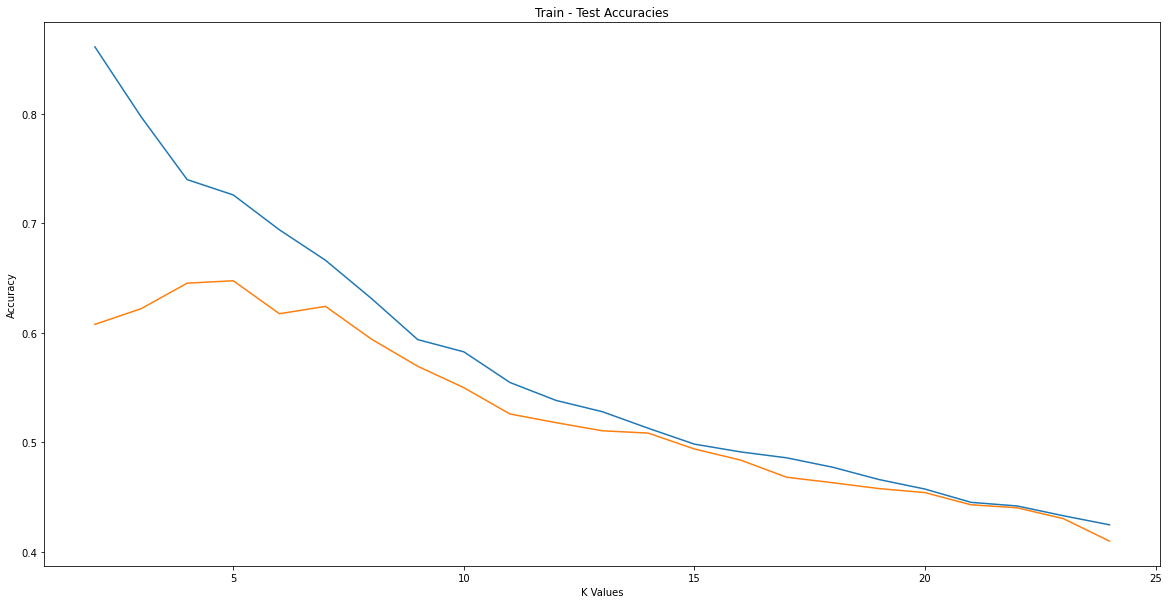

In [9]:
r2_train_list = []
r2_test_list = []
k_val = range(2,25)
for k in k_val:# 2,3,4,.....,24
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1) # Manhatten distance matric used p=1
    knn_reg.fit(x_train,y_train)
    r2_train = knn_reg.score(x_train,y_train) 
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
plt.figure(figsize=(20,10))    
plt.plot(k_val, r2_train_list)
plt.plot(k_val,r2_test_list)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Train - Test Accuracies')
plt.savefig('comparison.jpeg')

In [10]:
knn_clf = KNeighborsRegressor()

hyp = {'n_neighbors':np.arange(4,35),
       'p' : [1,2]}
gscv_knn = GridSearchCV(knn_clf, hyp, cv=5)
gscv_knn.fit(x_train,y_train)
gscv_knn.best_estimator_

KNeighborsRegressor(n_neighbors=4, p=1)

In [11]:
knn=gscv_knn.best_estimator_
y_pred = knn.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('MSE: ', mse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',mae)

r2 = r2_score(y_test,y_pred)
print('R2 score: ',r2)

MSE:  32.516019736842104
MAE:  3.8677631578947373
R2 score:  0.6452326474673674


In [12]:
y_pred_train = knn.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('MSE: ', mse)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE: ',mae)

r2 = r2_score(y_train,y_pred_train)
print('R2 score: ',r2)

MSE:  21.12405190677966
MAE:  3.068714689265537
R2 score:  0.7398165336354989


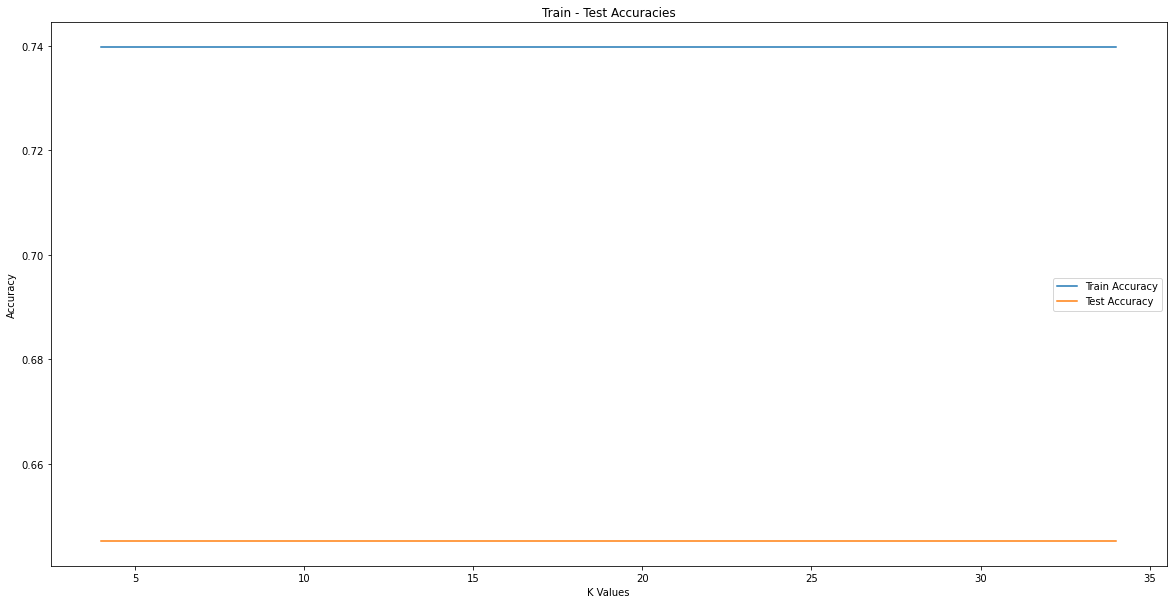

In [20]:
r2_train_list = []
r2_test_list = []

k_val = range(4, 35)
hyp = {'n_neighbors': np.arange(4, 35), 'p': [1, 2]}
for k in k_val:
    knn_clf = KNeighborsRegressor(n_neighbors=k)
    gscv_knn = GridSearchCV(knn_clf, hyp, cv=5)
    gscv_knn.fit(x_train, y_train)

    r2_train = gscv_knn.score(x_train, y_train)
    r2_train_list.append(r2_train)

    r2_test = gscv_knn.score(x_test, y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20, 10))
plt.plot(k_val, r2_train_list, label='Train Accuracy')
plt.plot(k_val, r2_test_list, label='Test Accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Train - Test Accuracies')
plt.legend()
plt.savefig('comparison.jpeg')